

# Project: Investigate TMDb Movie Database by Marc Nguyen


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, I will be investigating the TMDb Movie Database with various information on a variety of movies from 1960 to 2015.  The database includes information on movie tiltes, cast, budget, popularity, and revenues.
>
> With the movie database, I will be investigating two questions:  
First, I will be looking at what genre is the most popular for each year.  
Secondly, I will be exploring what kinds of properties are associated with movies that have high revenues?

In [154]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Define Function

In [155]:
# Print Scatter Plot
def print_scatter(series, x_value, y_value, title):
    series.plot(kind='scatter', x=x_value, y=y_value, figsize=(10, 6))
    plt.title(title);

In [156]:
# Print output in millions instead of long exponents
def print_in_mill(value1_name, value1, value2_name, value2):
    print("{}: ${:f}MM  |  {}: ${:f}MM".format(value1_name, value1/1000000, value2_name, value2/1000000))

## General Properties
>
> Looking a various information on the database before data wrangling

In [157]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [158]:
# Check column names for white space and naming convention
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [159]:
# get a general analysis of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


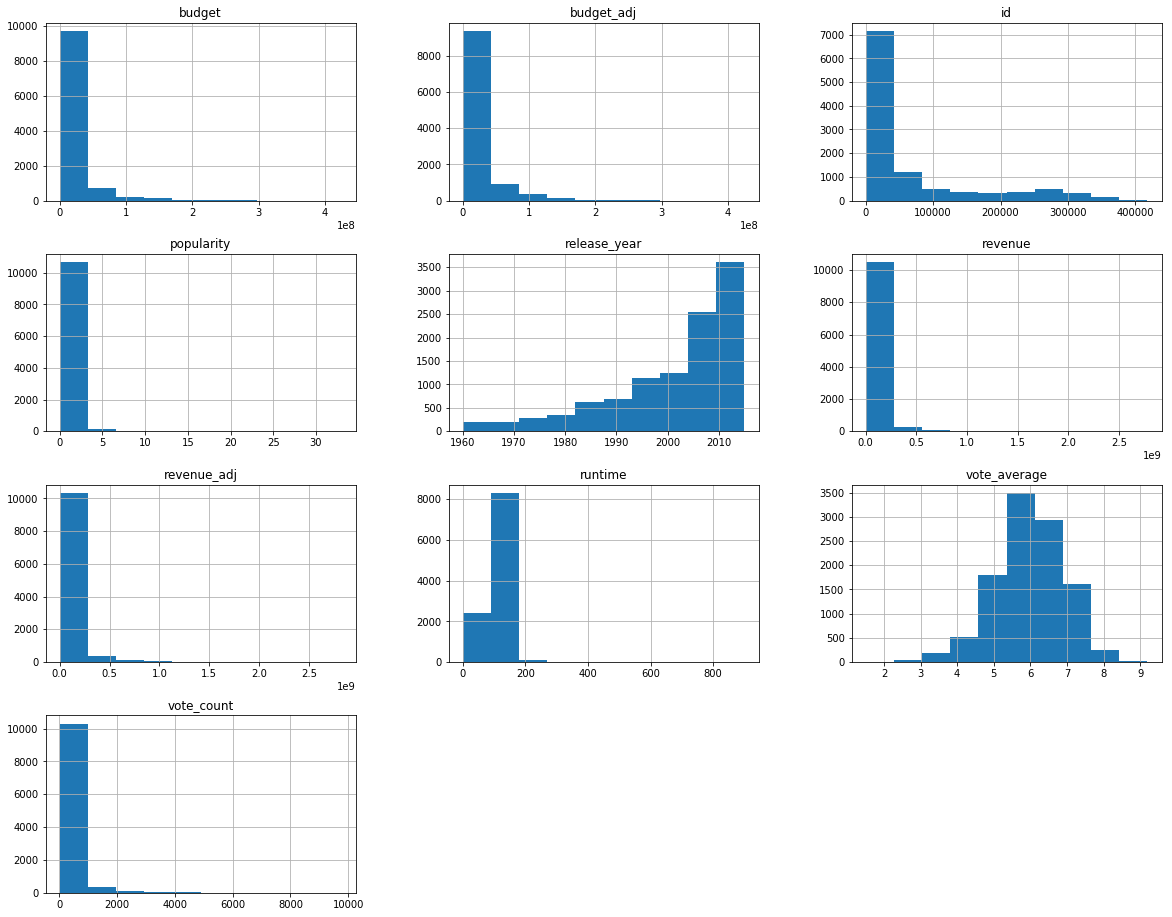

In [160]:
# Quick visual of the data
df.hist(figsize=(20,16));

<a id='wrangling'></a>
## Data Wrangling


### Note:
> 1. All the data type looks correct.  No change required.<br><br>
> 2. All column names looks good. No change required.


## Clean duplicate datas

In [161]:
# check number of duplicates
df.duplicated().sum()

1

In [162]:
# Check for duplicated entries
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [163]:
# Drop duplicated rows and verify it has been deleted
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Note:
> Found two identical data rows.  Only one is needed, so the duplicate was deleted.

### Investigate Missing data

In [164]:
# Check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [165]:
# Drop Null data in genres columns since there 23 rows missing data
# Since we couldn't perform contain search with Null data
df.dropna(axis=0, subset=['genres'], inplace=True)

### Note:
> Decided to drop all 23 rows with missing data in the genres since it is not wise to assume the genres or use the median and it will minimally impact the data analysis.

In [166]:
# Investigate null data in Director column
df[df.director.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,...,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,...,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,...,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,NaN,NaN,...,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,NaN,NaN,...,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,http://www.paathefilm.com/,NaN,NaN,...,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [167]:
# Investigate null data in Cast column
df[df.cast.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
587,319091,tt4185572,0.062536,0,0,The Hunting Ground,NaN,NaN,Kirby Dick,NaN,...,From the makers of The Invisible War comes a s...,103,Documentary,NaN,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
600,332479,tt4550996,0.047256,0,0,Star Wars: TIE Fighter,NaN,https://www.youtube.com/watch?v=PN_CP4SuoTU,Paul Johnson,"star wars, Tie Fighter, anime",...,Paul â€œOtaKingâ€ Johnson drops a real treat i...,7,Science Fiction|Action|Animation,NaN,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
1088,169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,NaN,http://www.vivianmaier.com/film-finding-vivian...,John Maloof|Charlie Siskel,NaN,...,Vivian Maier's photos were seemingly destined ...,83,Documentary,NaN,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1173,261041,tt3576038,0.159037,0,0,The Search for General Tso,NaN,NaN,Ian Cheney,NaN,...,From New York City to the farmlands of the Mid...,71,Documentary,NaN,4/20/14,14,6.9,2014,0.000000e+00,0.000000e+00
1177,269711,tt3723996,0.153047,0,0,JohnnyExpress,NaN,http://www.james-woo.com/#!jonnyexpress/ccag,Kyungmin Woo,Dark and occasionally cruel...,...,It's 2150. There are all sorts of Aliens livin...,5,Animation|Comedy|Science Fiction,Alfred Image Works,5/8/14,14,7.8,2014,0.000000e+00,0.000000e+00


In [168]:
# some of the columns with null values are not needed for this analysis, so they will be dropped
# The remaining null values will be noted in the analysis
# release_date is not needed since we already have release_year
# revenue is dropped because I will be using revenue_adj
# budget is dropped because I will be using budget_adj

df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)
df

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,94,Comedy|Animation|Family,3935,8.0,2015,1.609999e+08,7.854116e+08


### Note:
> I dropped several columns that will not be used in my analysis.  
> The following columns will be dropped: <br>
>'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'. <br><br>
> 'budget' and 'revenue' is dropped because I will be using the 'budget_adj' and 'revenue_adj' in my analysis. <br> 
> 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies' will not effect the popularity of the movie, so those are also dropped. <br>
> 'cast', 'director', and 'production_companies' is associated with 'budget', so those will not me used. <br>


In [169]:
# Verify no nulls and columns are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
id                10842 non-null int64
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.7+ KB


In [170]:
# Query for entries of zero
df.query("budget_adj == 0 or revenue_adj == 0 or runtime == 0")

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,Mr. Holmes,103,Mystery|Drama,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,Solace,101,Crime|Drama|Mystery,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,Wild Card,92,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,Survivor,96,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,Beyond the Reach,95,Thriller,81,5.5,2015,0.000000e+00,4.222338e+04
74,347096,2.165433,Mythica: The Darkspore,108,Action|Adventure|Fantasy,27,5.1,2015,0.000000e+00,0.000000e+00
75,308369,2.141506,Me and Earl and the Dying Girl,105,Comedy|Drama,569,7.7,2015,0.000000e+00,0.000000e+00
88,301875,1.959765,Equals,101,Drama|Romance|Science Fiction,135,5.6,2015,0.000000e+00,1.839999e+06
92,370687,1.876037,Mythica: The Necromancer,0,Fantasy|Action|Adventure,11,5.4,2015,0.000000e+00,0.000000e+00
93,307663,1.872696,Vice,96,Thriller|Science Fiction|Action|Adventure,181,4.1,2015,9.199996e+06,0.000000e+00


## Note:
> The database uses the value of zero for entries with no data or null values.  We replaced the values of zero with the mean value

In [171]:
# Making a copy before replacing values.  For question two, we will not be using the null data, since it will skew the data
df_2 = df.copy()

In [172]:
# Replace null values with mean
df['budget_adj'] = df['budget_adj'].replace(0, df['budget_adj'].mean())
df['revenue_adj'] = df['revenue_adj'].replace(0, df['revenue_adj'].mean())
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())

In [173]:
# Verify no more zeros
df.query("budget_adj == 0 or revenue_adj == 0 or runtime == 0")

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Note:
> About 3/4 of the budget and revenue information are given the value of zero.  We know that is not possible.  Zero instead of null is given to movies with no information on the budget and revenues.  In this analysis, I will be using the mean value to replace all the zeros in budget_adj, revenue_adj, and runtime.

<a id='eda'></a>
# Exploratory Data Analysis


## Research Question 1: Which genres are most popular from year to year in respect of volume?

In [174]:
# make 5 copies of clean database for each element in the genres columns
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [175]:
# split genres column into individual columns each each element
df_genres = df["genres"].str.split("|", expand=True)

In [176]:
# get sample data
df_genres.head(1)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None


In [177]:
# copy the split columns into individual database
df1['genres'] = df_genres[0]
df2['genres'] = df_genres[1]
df3['genres'] = df_genres[2]
df4['genres'] = df_genres[3]
df5['genres'] = df_genres[4]

In [178]:
# concatenate the individual database back into one
df_split = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [179]:
# sample to verify data looks good
df_split[df_split['original_title'] == 'Jurassic World']

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
10842,135397,32.985763,Jurassic World,124.0,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
21684,135397,32.985763,Jurassic World,124.0,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
32526,135397,32.985763,Jurassic World,124.0,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
43368,135397,32.985763,Jurassic World,124.0,None,5562,6.5,2015,1.379999e+08,1.392446e+09


In [180]:
# group data by year and show top genre for the year
df_split.groupby('release_year')['genres'].agg(lambda x: x.value_counts().index[0])

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966     Drama
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: genres, dtype: object

In [181]:
# another view, with nicer output and layout of top genre per year
df_split.groupby('release_year')['genres'].describe()

,count,unique,top,freq
release_year,,,,
1960,78,16,Drama,13
1961,75,17,Drama,16
1962,82,17,Drama,21
1963,91,17,Comedy,13
1964,111,18,Drama,20
1965,94,18,Drama,20
1966,119,18,Drama,16
1967,98,17,Comedy,17
1968,92,17,Drama,20


### Summary:
> To answer the question of what genre is the most popular per year, I had to split the 'genres' columns because the data was grouped together with a '|'.  After spliting the data into 5 individual database, I combine them back up and analysis the data.  Did a quick groupby 'release_year' and output the highest occuring genre for each year. <br><br>
I describe the most popular with the aspect of the most volume of movies made for the genres.  From the result, Drama is the most common movie genre, with the exception of a few years of Comedy being the most common movie made.

## Research Question 1: Which genres are most popular from year to year in respect to revenue, popularity, and vote ratings? 

In [182]:
# Look at year range
print('Starting year', df.release_year.min(), '  |  Ending Year', df.release_year.max())

Starting year 1960   |  Ending Year 2015


In [183]:
# Add column of revenue that represents revenue_adj in millions for easier reading
df['revenue_mill'] = df.apply(lambda row: '$' + str(round(row['revenue_adj'] / 1000000,2)) + 'MM', axis=1)

In [184]:
# Displayed the highest grossing films per year in millions
rev = df.groupby('release_year').max()[['original_title', 'genres', 'revenue_mill']]
rev

,original_title,genres,revenue_mill
release_year,,,
1960,Village of the Damned,Thriller|Music|Comedy|Crime,$73.73MM
1961,West Side Story,Western|Action|Adventure,$72.95MM
1962,What Ever Happened to Baby Jane?,Western|Action|Adventure|Drama,$94.65MM
1963,X: The Man with the X-Ray Eyes,Romance|Comedy|Drama,$95.94MM
1964,Zulu,Western|Action,$878.08MM
1965,What's New Pussycat?,War|Drama|Romance,$977.15MM
1966,Winnie the Pooh and the Honey Tree,Western,$87.33MM
1967,You Only Live Twice,Western,$729.4MM
1968,"Yours, Mine and Ours",Western,$68.96MM


In [185]:
# Display the most popular film per year
pop = df.groupby('release_year').max()[['original_title', 'genres', 'popularity']]
pop

,original_title,genres,popularity
release_year,,,
1960,Village of the Damned,Thriller|Music|Comedy|Crime,2.610362
1961,West Side Story,Western|Action|Adventure,2.631987
1962,What Ever Happened to Baby Jane?,Western|Action|Adventure|Drama,3.170651
1963,X: The Man with the X-Ray Eyes,Romance|Comedy|Drama,2.508235
1964,Zulu,Western|Action,3.153791
1965,What's New Pussycat?,War|Drama|Romance,1.910465
1966,Winnie the Pooh and the Honey Tree,Western,1.227582
1967,You Only Live Twice,Western,2.550704
1968,"Yours, Mine and Ours",Western,3.309196


In [186]:
# Display highest voted movie for each year
vote = df.groupby('release_year').max()[['original_title', 'genres', 'vote_average']]
vote

,original_title,genres,vote_average
release_year,,,
1960,Village of the Damned,Thriller|Music|Comedy|Crime,8.0
1961,West Side Story,Western|Action|Adventure,7.5
1962,What Ever Happened to Baby Jane?,Western|Action|Adventure|Drama,7.7
1963,X: The Man with the X-Ray Eyes,Romance|Comedy|Drama,7.5
1964,Zulu,Western|Action,7.7
1965,What's New Pussycat?,War|Drama|Romance,7.6
1966,Winnie the Pooh and the Honey Tree,Western,7.9
1967,You Only Live Twice,Western,7.6
1968,"Yours, Mine and Ours",Western,7.7


In [187]:
# compare top revenue movies with the most popular movies
rev['original_title'] == pop['original_title']

release_year
1960    True
1961    True
1962    True
1963    True
1964    True
1965    True
1966    True
1967    True
1968    True
1969    True
1970    True
1971    True
1972    True
1973    True
1974    True
1975    True
1976    True
1977    True
1978    True
1979    True
1980    True
1981    True
1982    True
1983    True
1984    True
1985    True
1986    True
1987    True
1988    True
1989    True
1990    True
1991    True
1992    True
1993    True
1994    True
1995    True
1996    True
1997    True
1998    True
1999    True
2000    True
2001    True
2002    True
2003    True
2004    True
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
Name: original_title, dtype: bool

In [188]:
# Compare the highest rated movies with the most popular movies
vote['original_title'] == pop['original_title']

release_year
1960    True
1961    True
1962    True
1963    True
1964    True
1965    True
1966    True
1967    True
1968    True
1969    True
1970    True
1971    True
1972    True
1973    True
1974    True
1975    True
1976    True
1977    True
1978    True
1979    True
1980    True
1981    True
1982    True
1983    True
1984    True
1985    True
1986    True
1987    True
1988    True
1989    True
1990    True
1991    True
1992    True
1993    True
1994    True
1995    True
1996    True
1997    True
1998    True
1999    True
2000    True
2001    True
2002    True
2003    True
2004    True
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
Name: original_title, dtype: bool

## Summary:
> In this section, we determine the most popular genre by the most popular movie of the year.  We invested the popularity in respect to highest revenue, highest rating, and highest popularity score.  It turned out all aspect coincide with each other for every year.

## Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [189]:
# Get a summary of the database again
df_2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [190]:
# Drop all rows with no revenue information
df_2.drop(df_2[df_2.revenue_adj == 0].index, inplace=True)

### Note:
> From the database, about 75% of the database doesn't have information on the revenue.  If I replace with the mean, it will skew the data, so I decide just to drop all the rows with no information on revenue and work with the remainder.

In [191]:
# Look at info of database after drop
df_2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [192]:
# get the 25% and 75% quantile values
top_rev = df_2.revenue_adj.quantile(0.75)
bot_rev = df_2.revenue_adj.quantile(0.25)
print_in_mill('75% quantile value', top_rev, '25% quantile value', bot_rev)

75% quantile value: $131.648236MM  |  25% quantile value: $10.465848MM


### Note:
> With the remainding data, I am taking the top 25% of revenue and compare with the low performing bottom 25% of the revenue.

In [193]:
# create two database with the mask.  One database for high revenue movies and one for low revenue movies.
high_rev = df_2[df_2['revenue_adj'] > top_rev]
low_rev  = df_2[df_2['revenue_adj'] < bot_rev]

In [194]:
# get a picture of high revenue movies
high_rev.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1.212000e+03,1.212000e+03
mean,28939.800330,2.034168,116.413366,1127.141089,6.419472,1999.226898,7.749291e+07,3.527467e+08
std,54830.184114,2.168539,27.846279,1278.687582,0.716077,12.578034,5.626082e+07,2.814012e+08
min,11.000000,0.017498,69.000000,10.000000,4.100000,1960.000000,0.000000e+00,1.316650e+08
25%,1405.000000,0.939904,99.000000,288.500000,5.900000,1993.000000,3.424778e+07,1.774491e+08
50%,9320.000000,1.480935,113.000000,656.500000,6.400000,2002.000000,6.789044e+07,2.535503e+08
75%,22815.750000,2.416236,128.250000,1483.000000,6.900000,2009.000000,1.104327e+08,4.232651e+08
max,417859.000000,32.985763,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [195]:
# get a picture of low revenue movies
low_rev.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1.212000e+03,1.212000e+03
mean,74684.108086,0.490816,101.518977,96.352310,6.020297,2005.315182,7.170688e+06,2.955570e+06
std,89443.180491,0.387679,16.888681,149.847113,0.855468,9.218049,1.321782e+07,3.120692e+06
min,5.000000,0.001117,15.000000,10.000000,2.200000,1962.000000,0.000000e+00,2.370705e+00
25%,13175.500000,0.246173,91.000000,21.000000,5.500000,2001.000000,0.000000e+00,2.587075e+05
50%,30839.500000,0.404558,99.000000,46.000000,6.100000,2008.000000,9.765490e+05,1.668770e+06
75%,103329.000000,0.634495,108.000000,111.000000,6.600000,2012.000000,9.211825e+06,5.157012e+06
max,358895.000000,3.989231,338.000000,1777.000000,8.400000,2015.000000,1.212261e+08,1.046155e+07


## Look at revenue in respect to budget

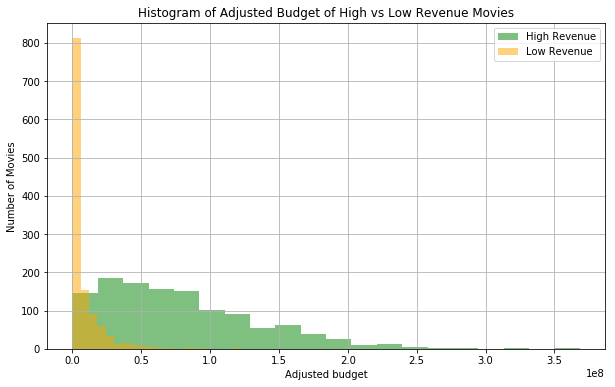

In [196]:
# Graphing the histogram of high revenue movies and compare it with low revenue movies in respect to budget
high_rev.budget_adj.hist(alpha=0.5, bins=20, color='green', label = 'High Revenue', figsize=(10, 6))
low_rev.budget_adj.hist(alpha=0.5, bins=20, color='orange', label = 'Low Revenue', figsize=(10, 6))
plt.title('Histogram of Adjusted Budget of High vs Low Revenue Movies')
plt.xlabel('Adjusted budget')
plt.ylabel('Number of Movies')
plt.legend();

In [197]:
# Finding average budget for high budget movies vs low budget movies
high_rev_budget = high_rev.budget_adj.mean()/1000000
low_rev_budget = low_rev.budget_adj.mean()/1000000
high_rev_budget, low_rev_budget

(77.49290768235112, 7.170688321740281)

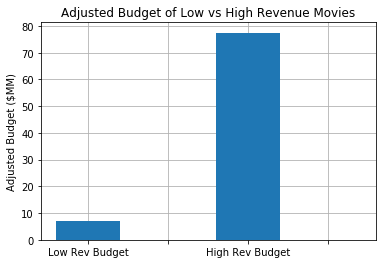

In [198]:
# Graph low vs high revenue movies in terms of budget
plt.grid(zorder=0)
plt.bar([1, 2, 3, 4], [low_rev_budget, 0, high_rev_budget, 0], tick_label=['Low Rev Budget', '', 'High Rev Budget', ''], zorder=3)
plt.title('Adjusted Budget of Low vs High Revenue Movies')
plt.ylabel('Adjusted Budget ($MM)');

## Summary:
> From the graph, budget is one clear indication of a high earning movies.  Higher budget movies earn more than low budget movies.  When we looked at the mean of low budget vs high budget movies, high budget movies spend about 10 times more than low budget movies.  High budget normally correlates to bigger movies stars and bigger directors.

## Look at revenue in respect to genres

In [199]:
# split genres columns into individual genres
low_genres = low_rev["genres"].str.split("|", expand=True) 

In [200]:
# create low revenue genre list with number of movies made per genre
low_genres_total = low_genres.apply(pd.value_counts)
low_genres_total.drop([1, 2, 3, 4], axis=1, inplace=True)
low_genres_total.sort_values(by=0, ascending=False)

,0
Drama,399.0
Comedy,253.0
Action,134.0
Horror,83.0
Documentary,69.0
Thriller,67.0
Crime,49.0
Adventure,40.0
Romance,25.0
Fantasy,20.0


In [201]:
# split genres columns into individual genres
high_genres = high_rev["genres"].str.split("|", expand=True) 

In [202]:
# create high revenue genre list with number of movies made per genre
high_genres_total = high_genres.apply(pd.value_counts)
high_genres_total.drop([1, 2, 3, 4], axis=1, inplace=True)
high_genres_total

,0
Action,261
Adventure,176
Animation,70
Comedy,216
Crime,46
Documentary,1
Drama,194
Family,20
Fantasy,48
History,8


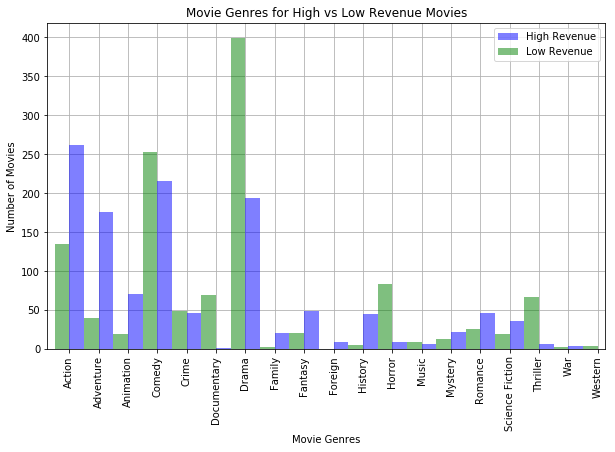

In [203]:
# create graph of low vs high revenue movies in respect to genres
ax = high_genres_total.plot(kind='bar', alpha=0.5, color='blue', label='High Revenue', position=0, figsize=(10, 6), zorder=3)
low_genres_total.plot(kind='bar', alpha=0.5, color='green', label='Low Revenue', position=1, ax=ax, zorder=3)
plt.legend(['High Revenue', 'Low Revenue'])
plt.grid(zorder=0)
plt.title('Movie Genres for High vs Low Revenue Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Movie Genres');

## Summary:
> From a graph, it looks there is more money to be made making action/adventure movies, with are normally tied to high budget movies.  Majority of the low revenue movies are in the drama genre.

In [204]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 10 columns):
id                4849 non-null int64
popularity        4849 non-null float64
original_title    4849 non-null object
runtime           4849 non-null int64
genres            4849 non-null object
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 416.7+ KB


## Looking for any other correlations between the other elements

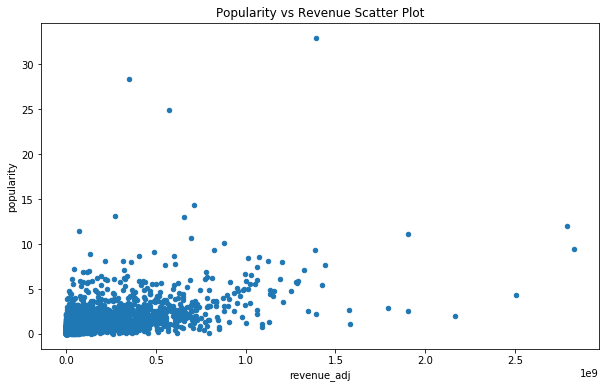

In [205]:
print_scatter(df_2, 'revenue_adj', 'popularity', 'Popularity vs Revenue Scatter Plot')

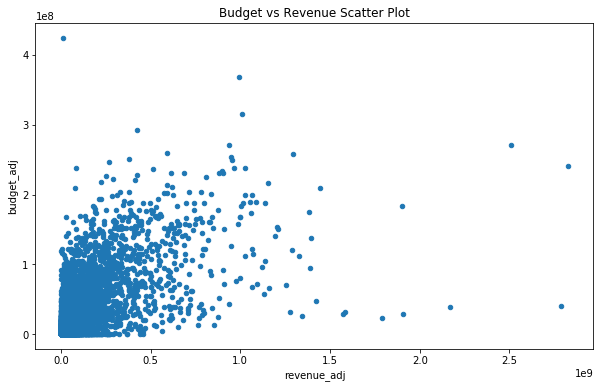

In [206]:
print_scatter(df_2, 'revenue_adj', 'budget_adj', 'Budget vs Revenue Scatter Plot')

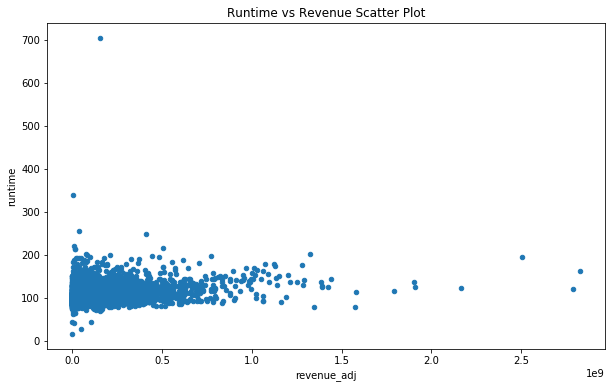

In [207]:
print_scatter(df_2, 'revenue_adj', 'runtime', 'Runtime vs Revenue Scatter Plot')

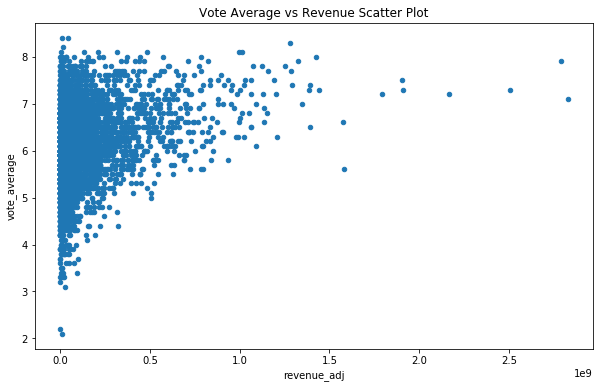

In [208]:
print_scatter(df_2, 'revenue_adj', 'vote_average', 'Vote Average vs Revenue Scatter Plot')

<a id='conclusions'></a>
## Conclusions

> We started out looking at two questions. What genre is the most popular for each year and what kinds of properties are associated with movies that have high revenues?<br><br>
> We learned drama is the most made movie drama every year from 1960 to 2015 except for a few years where comedy was the most widely made.  We also looked at the most popular movie each year and found out that the most popular movies is the ones with the highest revenue, highest vote rating, and highest popularity rating.  <br>
> For the property that generate the most revenue for movies is budget.  The higher the budget, the higher the revenue.  We could also see a positive correlation between vote average and revenue.

### Limitations
> The greatest limitation to my analysis is roughly 65% of the budget and revenue values is null, which limits my accuracy of my analysis.  I am limited to using only 35% of the database for analysis when using those factors.  Many of the null values are due to movies are produced by low budget companies and due to older movies not having those information.  So, the data may be skewed due to this factor.
There are other missing data in other columns, but those columns are dropped.  The one column with missing data that was used was the ‘genres’ columns.  For ‘genres’, I dropped 23 rows, which is only 0.2%, which has very little effect of the final outcome.
